In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/Users/vivianchung/Downloads/vgsales.csv')

## Exploring the dataset

In [81]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [82]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [84]:
df['Year']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

1. I will change the datatype of the 'Year' column from float to integar because there's no need for it to be a float

In [85]:
df.shape

(16598, 11)

In [86]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [87]:
rows_with_missing_data = df[df.isnull().any(axis=1)]
rows_with_missing_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


2. I will replace the missing values in the 'Year' column with the most common year (mode)
3. I will replace the missing values in the 'Publisher' column with 'Unknown'

In [88]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [89]:
df['Publisher'].nunique()

578

## Cleaning the dataset
1. Change the 'Year' datatype from float to integar
2. Replace missing values in 'Year' with the most common year (mode)
3. Replace missing values in 'Publisher' with 'Unknown'

IMPORTANT NOTE: I will need to deal with the missing values in the 'Year' column because I got an error message so let's do the second item on our cleaning list first

### Replace missing values in 'Year' with mode year

In [90]:
# Calculating the mode year
mode_yr = df['Year'].mode()[0]
mode_yr

2009.0

In [91]:
df['Year'].fillna(mode_yr, inplace=True)

In [92]:
df['Year'].isnull().sum()

0

### Change 'Year' datatype from float to integar

In [93]:
df['Year'] = df['Year'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Replace missing values in 'Publisher' with 'Unknown'

In [95]:
df['Publisher'].fillna('Unknown', inplace=True)

In [96]:
df['Publisher'].isnull().sum()

0

### Final checks that the dataset is clean

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [98]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Visualizations

## Peak Video Game Sales in North America, Europe, Japan, and Globally in 2009

In [100]:
NA = df.groupby('Year')['NA_Sales'].sum()

In [101]:
EU = df.groupby('Year')['EU_Sales'].sum()

In [102]:
JP = df.groupby('Year')['JP_Sales'].sum()

In [103]:
glo = df.groupby('Year')['Global_Sales'].sum()

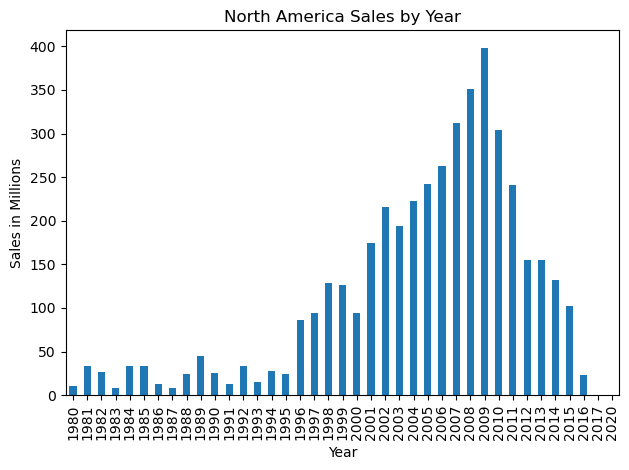

In [104]:
NA.plot(kind='bar')
plt.title('North America Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> 2009 had the most sales in North America

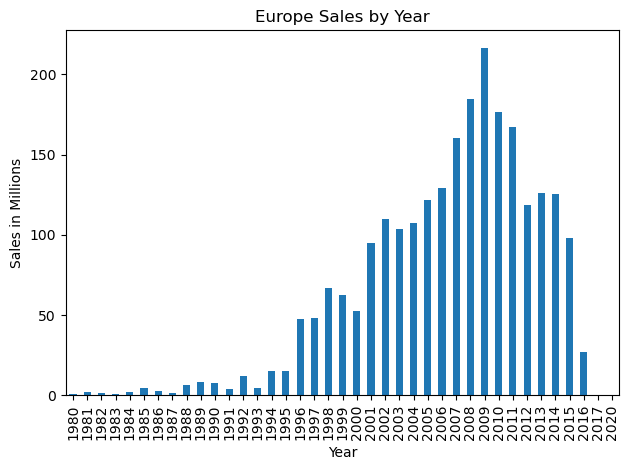

In [105]:
EU.plot(kind='bar')
plt.title('Europe Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> 2009 was also a big year for Europe

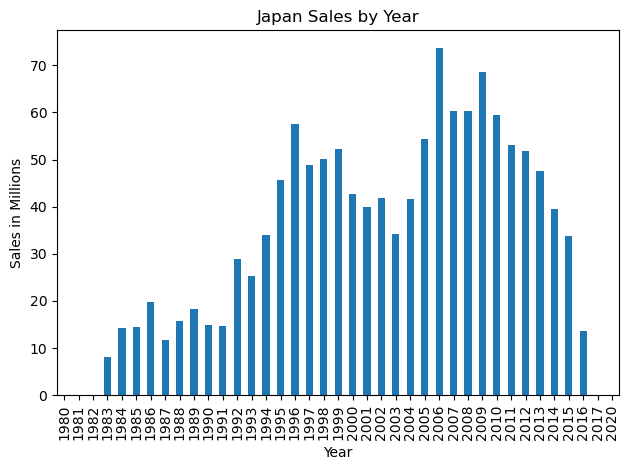

In [106]:
JP.plot(kind='bar')
plt.title('Japan Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> In Japan, 2006 generated the most sales, followed by 2009

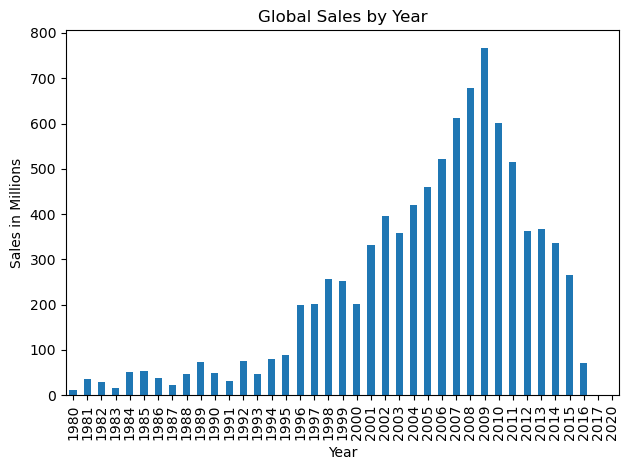

In [107]:
glo.plot(kind='bar')
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> Globally, 2009 was the year that generated the most video game sales

In [108]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

## Most Popular Genre: Action and Sports

In [146]:
genre_count = df['Genre'].value_counts()
genre_count

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

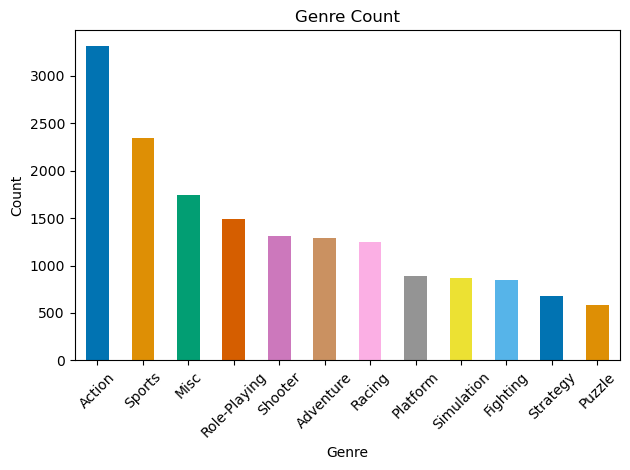

In [113]:
colors = sns.color_palette('colorblind')
genre_count.plot(kind='bar', color=colors)
plt.title('Genre Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> Action and Sports are the top 2 most popular video game genres

## Action and Sports Generated the Most Sales

In [144]:
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sales_by_genre

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

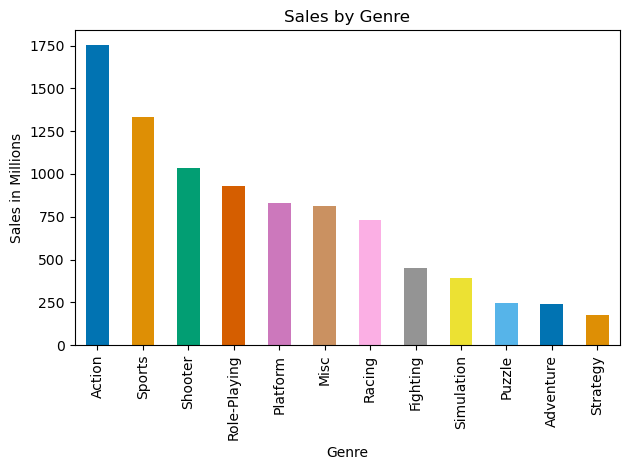

In [145]:
colors = sns.color_palette('colorblind')
sales_by_genre.plot(kind='bar', color=colors)
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> Action and sports genre also generated the most sales globally. 

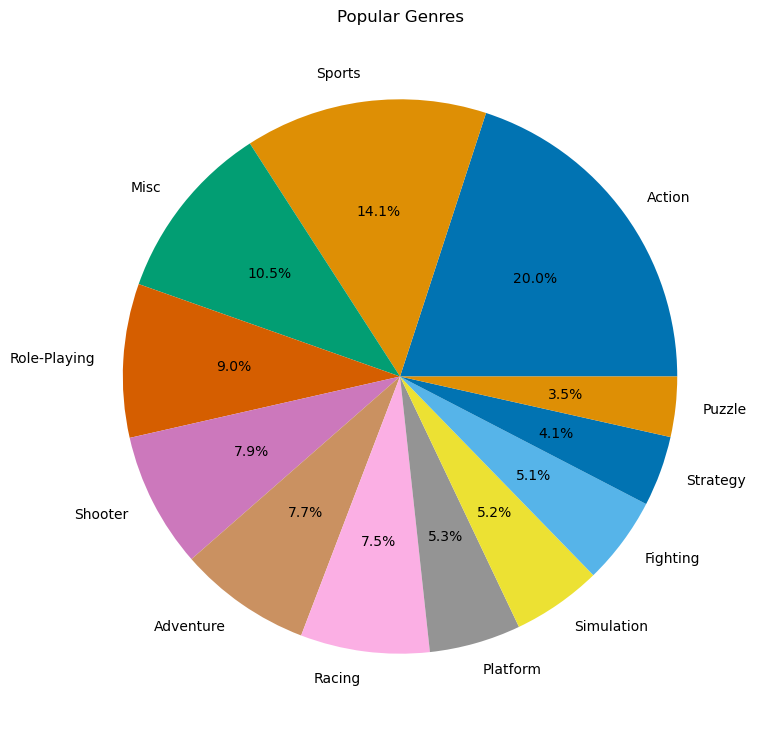

In [162]:
labels = df['Genre'].value_counts().index
sizes = df['Genre'].value_counts()
colors = sns.color_palette('colorblind')
plt.figure(figsize = (9,9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors)
plt.title('Popular Genres')
plt.show() 

## Most Popular Publisher: Electronic Arts

In [130]:
top10_publisher = df['Publisher'].value_counts().head(10)
top10_publisher

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

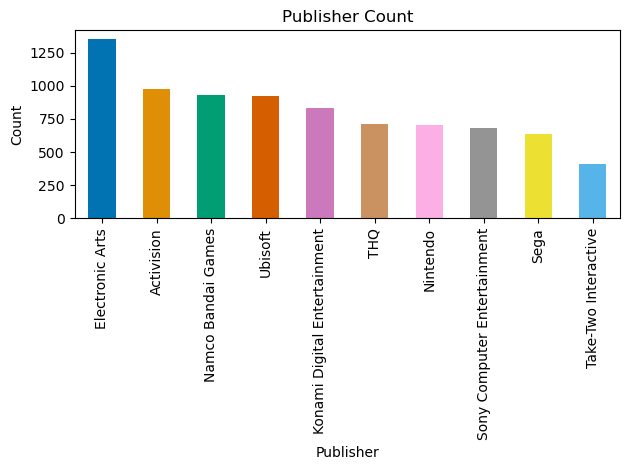

In [131]:
colors = sns.color_palette('colorblind')
top10_publisher.plot(kind='bar', color=colors)
plt.title('Publisher Count')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> The most popular video game publisher is Electronic Arts

## Most Popular Platform: DS and PS2

In [134]:
top10_platform = df['Platform'].value_counts().head(10)
top10_platform

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64

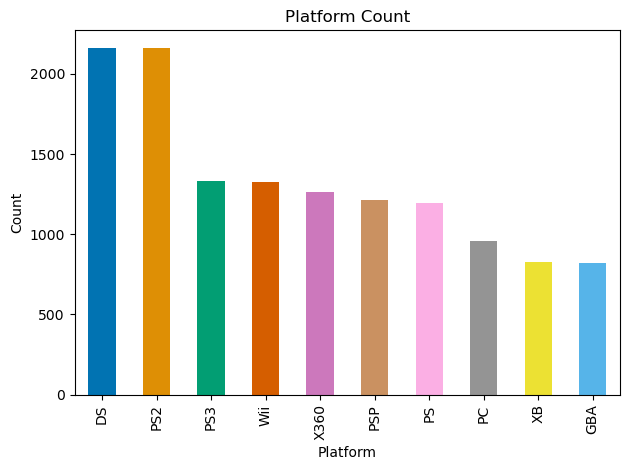

In [135]:
colors = sns.color_palette('colorblind')
top10_platform.plot(kind='bar', color=colors)
plt.title('Platform Count')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> The top 2 most popular video game platforms are DS and PS2

# Final Thoughts

1. 2009 had the most video game sales in North America, Europe, and Globally. Japan has the most video game sales in 2006, followed by 2009
2. The most popular video game generes are Action and Sports
3. Action and Sports genres generated the most revenue globally
4. The most popular video game publisher is Electronic Arts
5. The top 2 most popular video game platforms are DS and PS2